In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np

In [3]:
(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k',
                                          split = (tfds.Split.TRAIN, tfds.Split.TEST),
                                          as_supervised=True,
                                          with_info=True)


Shuffling and writing examples to /home/sebastien/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXHHER8/imdb_reviews-train.tfrecord


Shuffling and writing examples to /home/sebastien/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXHHER8/imdb_reviews-test.tfrecord


Shuffling and writing examples to /home/sebastien/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXHHER8/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /home/sebastien/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
encoder = info.features['text'].encoder

In [5]:
print('Vocabulary size : {}'.format(encoder.vocab_size))

Vocabulary size : 8185


In [6]:
sample_string = 'Hello Tensorflow.'

encoded_string = encoder.encode(sample_string)
print(encoded_string)
original_string = encoder.decode(encoded_string)
print(original_string)

[4025, 222, 6307, 2327, 2934, 7975]
Hello Tensorflow.


In [8]:
for ts in encoded_string:
    print("{} -> {}".format(ts, encoder.decode([ts])))

4025 -> Hell
222 -> o 
6307 -> Ten
2327 -> sor
2934 -> flow
7975 -> .


In [13]:
for train_example, train_label in train_data.take(2):
    print('Encoded text:', train_example[:10].numpy())
    print('Label:', train_label.numpy())

Encoded text: [  62   18   41  604  927   65    3  644 7968   21]
Label: 0
Encoded text: [  12   31   93  867    7 1256 6585 7961  421  365]
Label: 0


In [14]:
encoder.decode(train_example)

'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of what was causing them or why. I admit, I may have missed part of the film, but i watched the majority of it and everything just seemed to happen of its own accord without any real concern for anything else. I cant recommend this film at all.'

In [15]:
BUFFER_SIZE = 1000

train_batches = (train_data.shuffle(BUFFER_SIZE).padded_batch(32, padded_shapes=([None],[])))

test_batches = (test_data.padded_batch(32, padded_shapes=([None],[])))

In [16]:
for example_batch, label_batch in train_batches.take(2):
    print("Batch shape: ", example_batch.shape)
    print("Label shape: ", label_batch.shape)

Batch shape:  (32, 1179)
Label shape:  (32,)
Batch shape:  (32, 1296)
Label shape:  (32,)


In [17]:
model = keras.Sequential([
    keras.layers.Embedding(encoder.vocab_size, 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [19]:
history = model.fit(train_batches,
                   epochs=10,
                   validation_data=test_batches,
                   validation_steps=30)

Epoch 1/10
782/782 [==============================] - 8s 11ms/step - loss: 0.6803 - accuracy: 0.5006 - val_loss: 0.6620 - val_accuracy: 0.5052
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.6197 - accuracy: 0.5547 - val_loss: 0.5952 - val_accuracy: 0.6073
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.5409 - accuracy: 0.6656 - val_loss: 0.5335 - val_accuracy: 0.7052
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4753 - accuracy: 0.7498 - val_loss: 0.4838 - val_accuracy: 0.7458
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4230 - accuracy: 0.8018 - val_loss: 0.4457 - val_accuracy: 0.7969
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.3823 - accuracy: 0.8326 - val_loss: 0.4174 - val_accuracy: 0.8250
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.3508 - accuracy: 0.8520 - val_loss: 0.3976 - val_accuracy: 0.8281
Epoch

In [21]:
loss, accuracy = model.evaluate(test_batches)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

    782/Unknown - 4s 5ms/step - loss: 0.3325 - accuracy: 0.8617Loss:  0.33247964344251796
Accuracy:  0.86168


In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
history_dict

{'loss': [0.6803431693267822,
  0.6196590314102173,
  0.5409946682357788,
  0.47552279441833495,
  0.4228077032470703,
  0.3824332581424713,
  0.3509985034561157,
  0.325074653711319,
  0.3047890127038956,
  0.2879188303899765],
 'accuracy': [0.50056,
  0.55472,
  0.6656,
  0.74976,
  0.80176,
  0.83256,
  0.852,
  0.86568,
  0.87828,
  0.88652],
 'val_loss': [0.6619691610336303,
  0.595171191294988,
  0.5334845582644144,
  0.4837939977645874,
  0.44570755660533906,
  0.41741993923981985,
  0.3975768268108368,
  0.38234123984972634,
  0.37062299946943916,
  0.36201163977384565],
 'val_accuracy': [0.5052083,
  0.60729164,
  0.70520836,
  0.74583334,
  0.796875,
  0.825,
  0.828125,
  0.85625,
  0.85833335,
  0.85625]}

In [24]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)


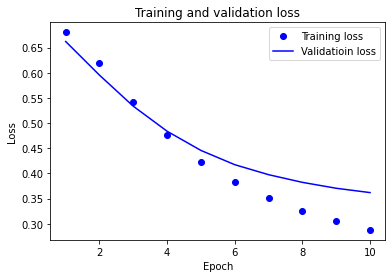

In [25]:
plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validatioin loss")
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

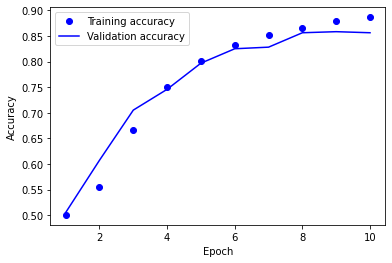

In [26]:
plt.clf()

plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()